## The attached code is a run of the Decision Tree Regressor Results: model on data from booking without the addition of new features

Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE   Train MSE  Train MAE   Test R2  Test RMSE  \
0      6  0.690101   29.638619  878.447715  20.318153  0.689580  29.892646   
1      8  0.780326   24.953853  622.694801  16.353006  0.781749  25.065006   
2     10  0.846508   20.858845  435.091423  12.817690  0.840649  21.417392   
3     12  0.907329   16.207637  262.687509   9.159004  0.895153  17.372714   

     Test MSE   Test MAE  
0  893.570276  20.481136  
1  628.254530  16.619962  
2  458.704675  13.255384  
3  301.811197   9.672534  


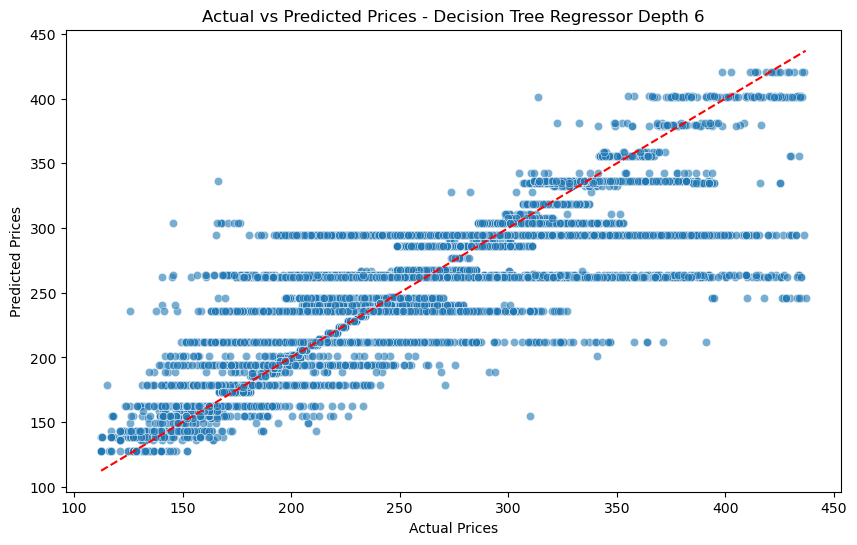

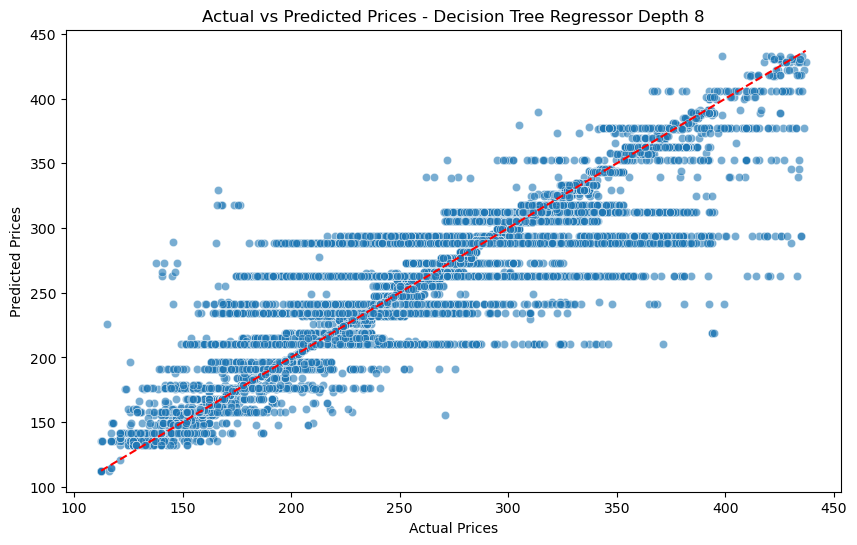

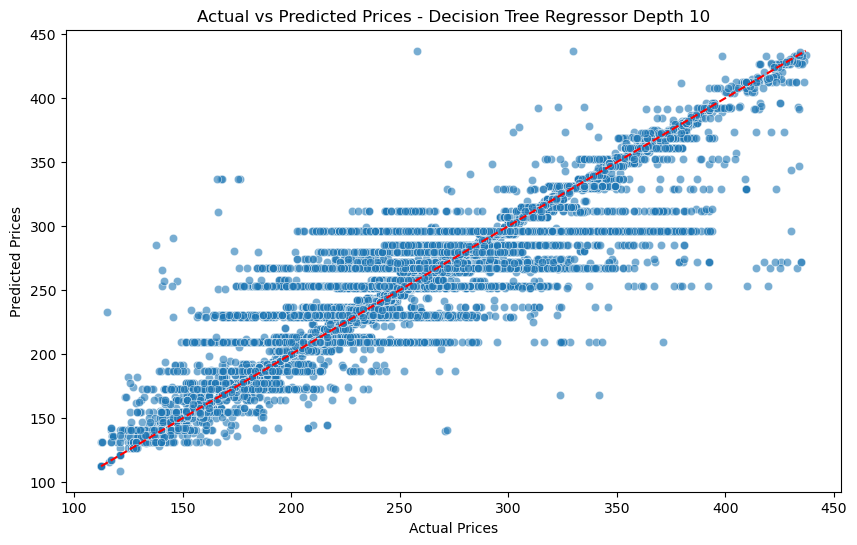

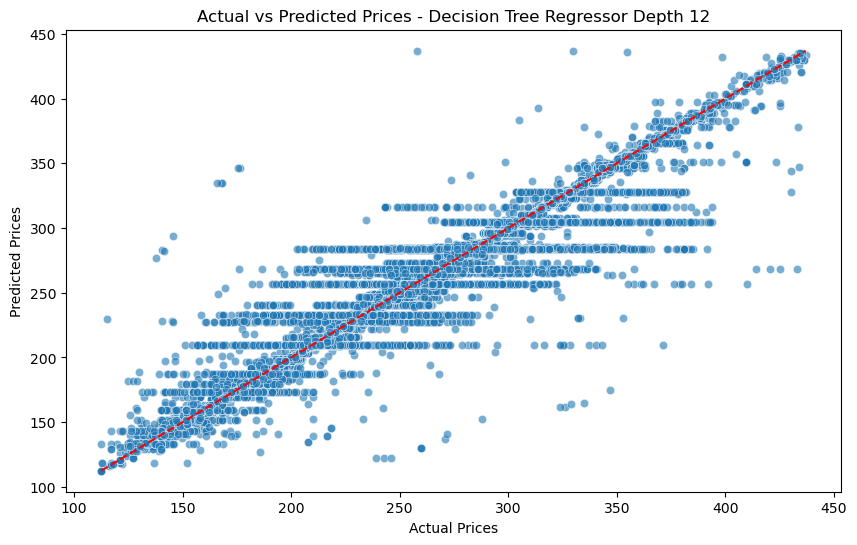

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./0507_cleaned_booking_hotels.csv')
df2 = pd.read_csv('./2506_cleaned_booking_hotels.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()


## The attached code is a run of the Decision Tree Regressor model on booking data with additions of new features and after we have done one hot encoding for them (a period of the month - beginning, middle and end, day of the week of check in, day of the week of check out)

Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE   Train MSE  Train MAE   Test R2  Test RMSE  \
0      6  0.766917   25.867747  669.140348  19.006098  0.753027  26.677526   
1      8  0.865561   19.645654  385.951739  14.169905  0.858818  20.170190   
2     10  0.927127   14.463963  209.206225   9.777870  0.920429  15.142530   
3     12  0.959907   10.728516  115.101063   6.674140  0.951061  11.875344   
4     13  0.970419    9.215250   84.920831   5.408430  0.959901  10.749534   
5     14  0.978595    7.838956   61.449225   4.289870  0.967087   9.738732   

     Test MSE   Test MAE  
0  711.690418  19.577770  
1  406.836583  14.548003  
2  229.296213  10.219299  
3  141.023791   7.295074  
4  115.552473   6.171014  
5   94.842909   5.181331  


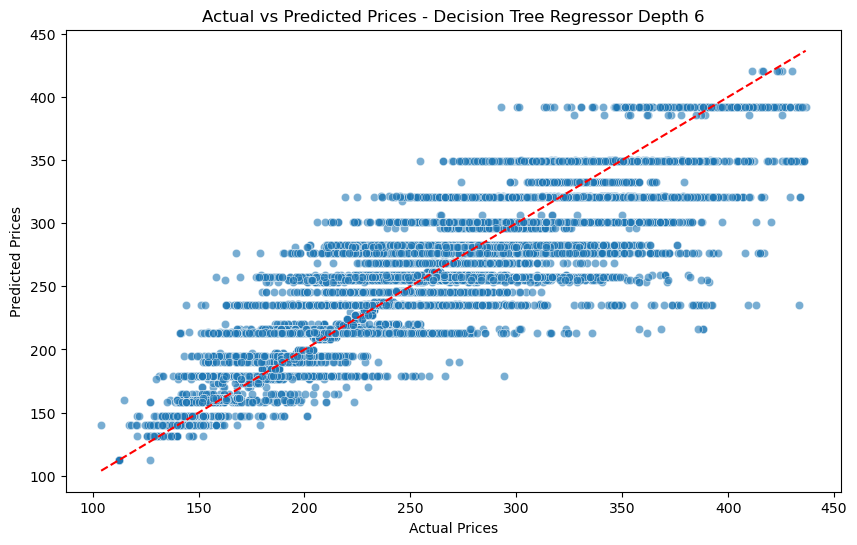

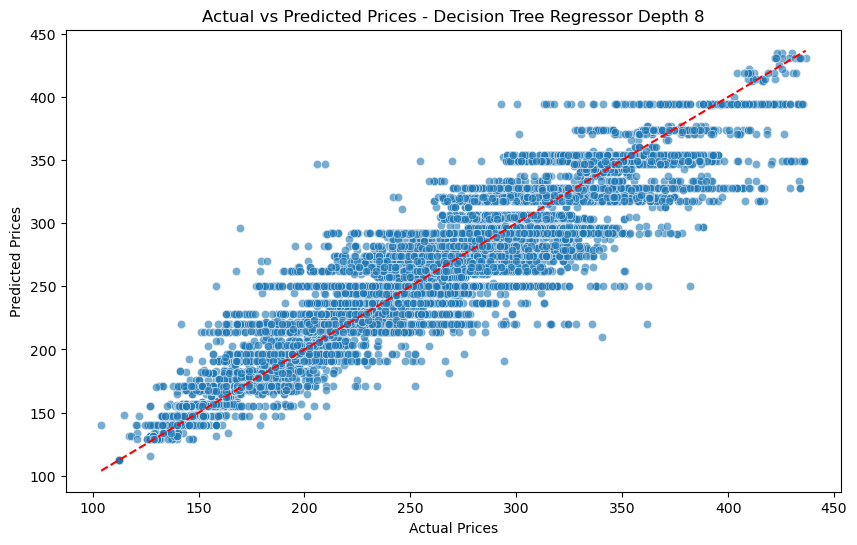

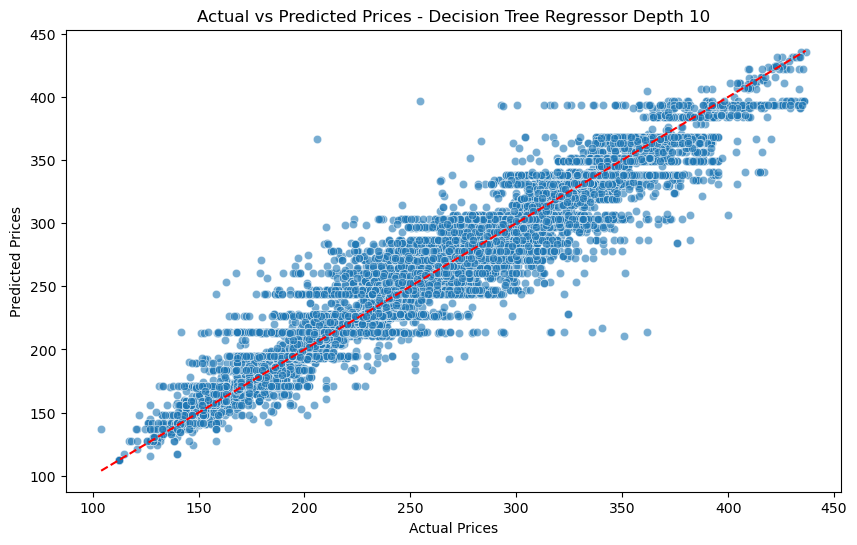

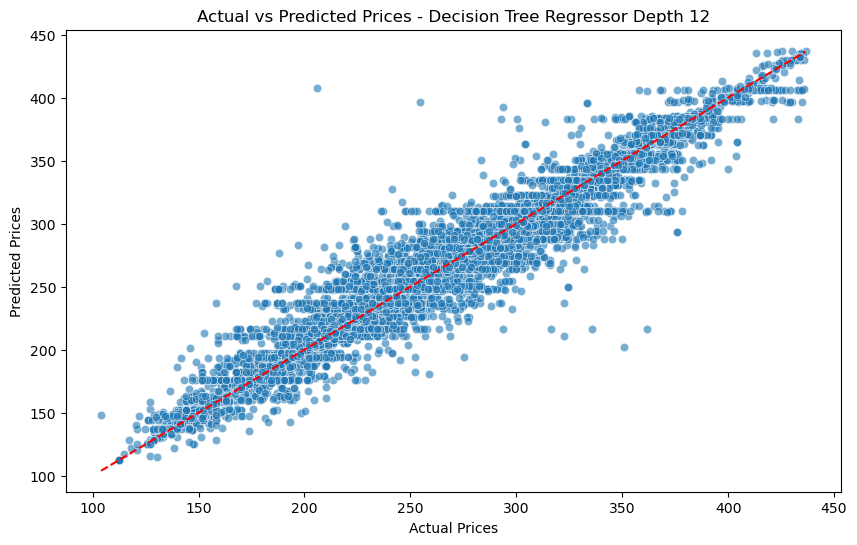

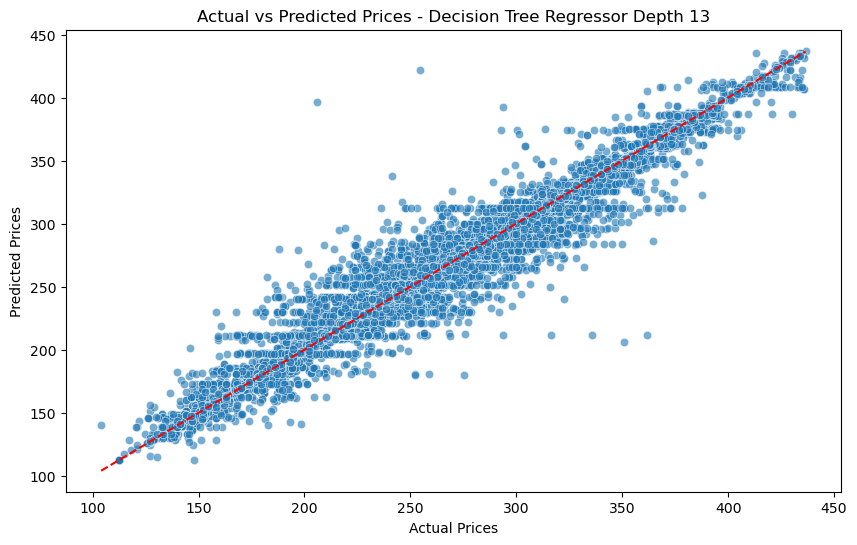

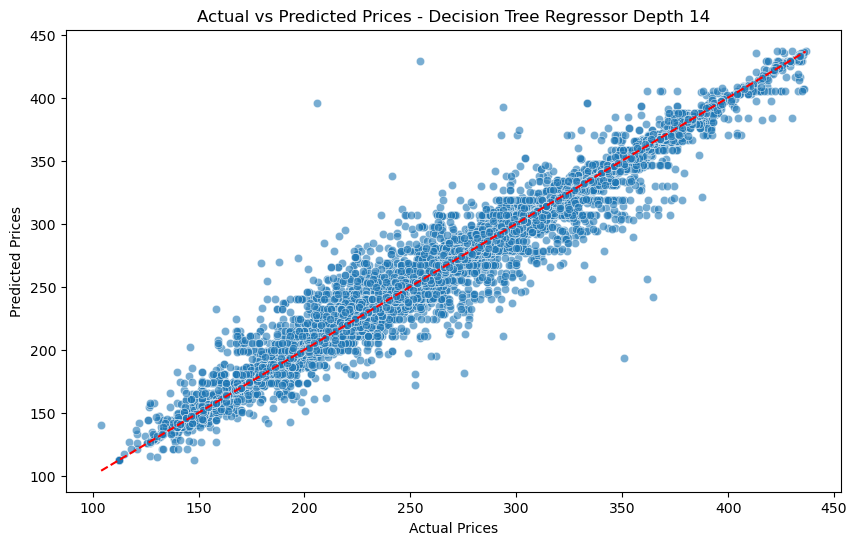

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12,13,14]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()


## In the attached code snippet we tried to run the regression tree where the first node is the star rating of each hotel

Decision Tree Regressor Results with Star Rating as First Node:
    Depth  Star Rating  Train R2  Train RMSE   Train MSE  Train MAE   Test R2  \
0       6     3.000000  0.695125   27.912986  779.134783  19.115806  0.695296   
1       6     4.000000  0.570498   31.012687  961.786768  21.626791  0.575926   
2       6     5.000000  0.649774   24.998478  624.923906  16.130498  0.466698   
3       6     2.000000  0.797019   22.497939  506.157276  14.988335  0.742066   
4       6     3.388785  0.837331   24.191617  585.234342  16.066893  0.806470   
5       6     1.000000  0.964434   11.143302  124.173172   7.372581  0.951472   
6       8     3.000000  0.776318   23.908981  571.639370  15.651736  0.776826   
7       8     4.000000  0.691424   26.286825  690.997152  17.435888  0.694604   
8       8     5.000000  0.770220   20.248641  410.007455  11.801452  0.337429   
9       8     2.000000  0.863929   18.420339  339.308902  11.822364  0.784645   
10      8     3.388785  0.883974   20.431012 

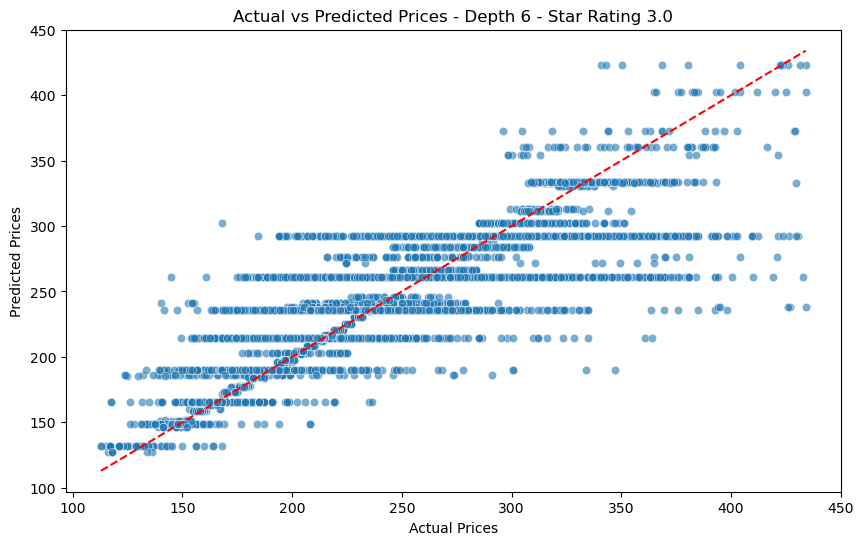

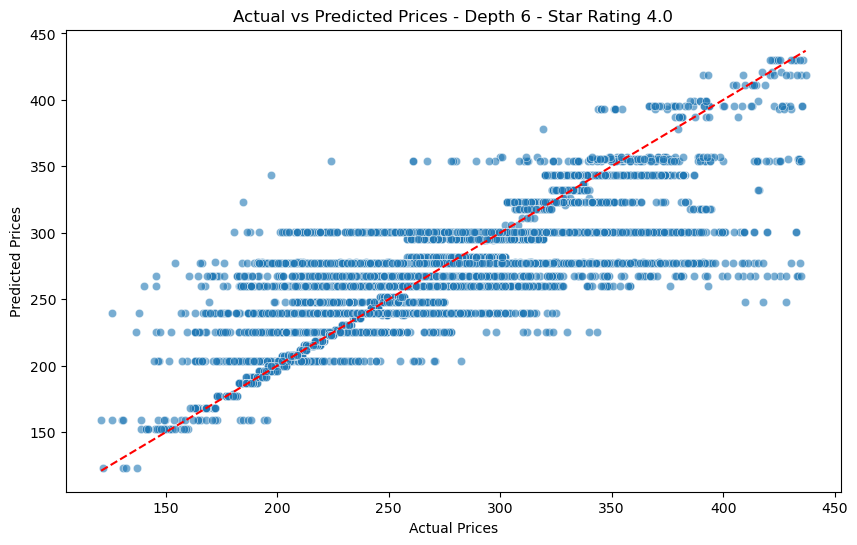

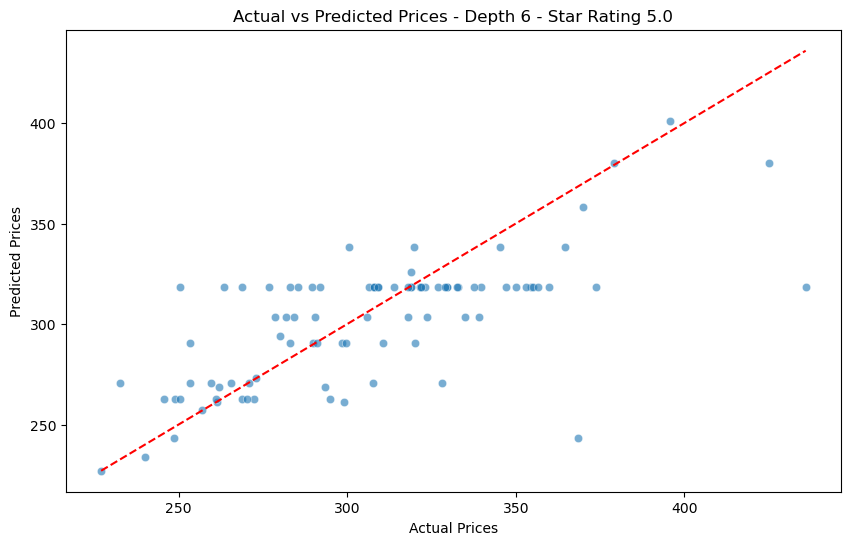

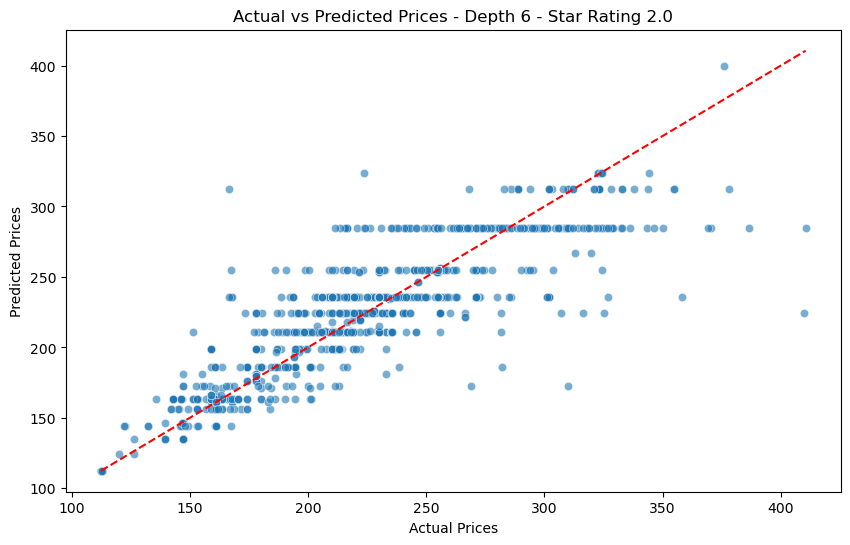

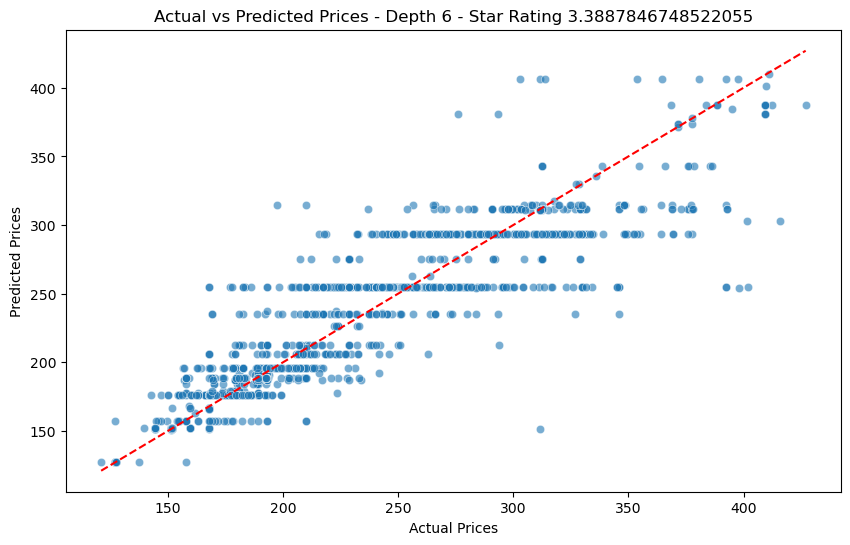

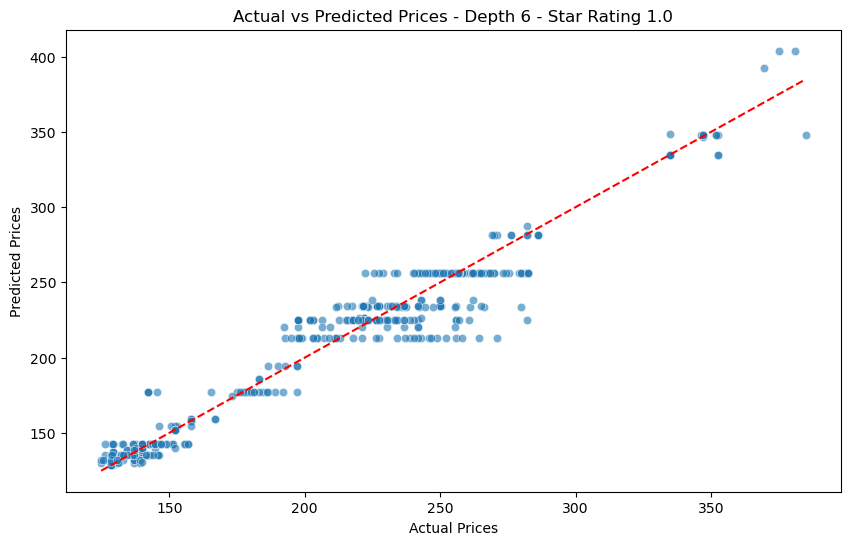

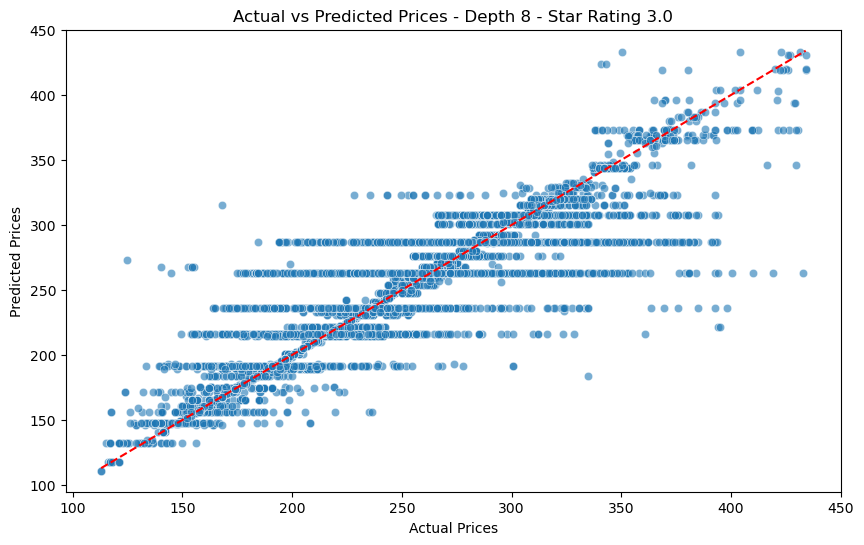

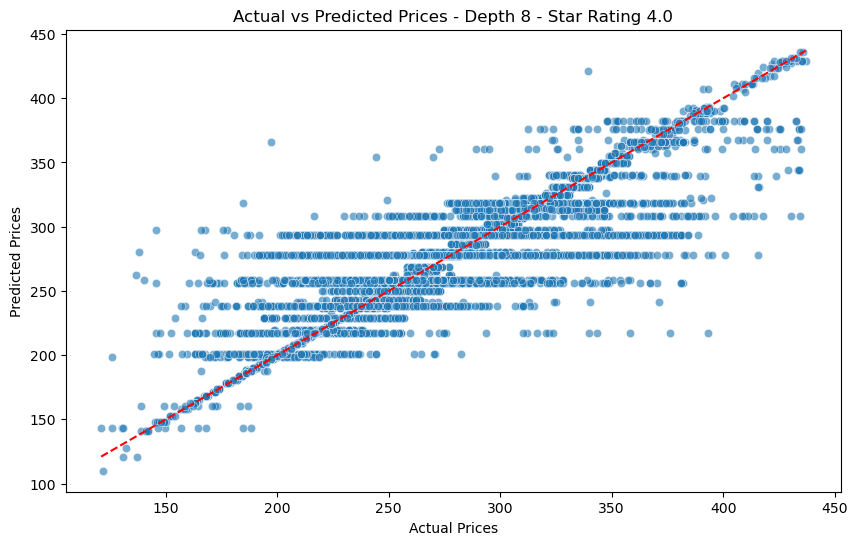

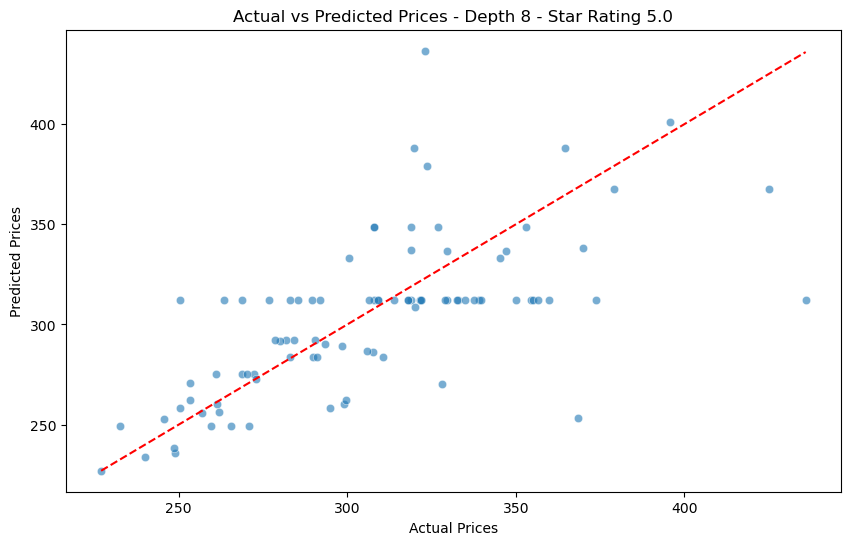

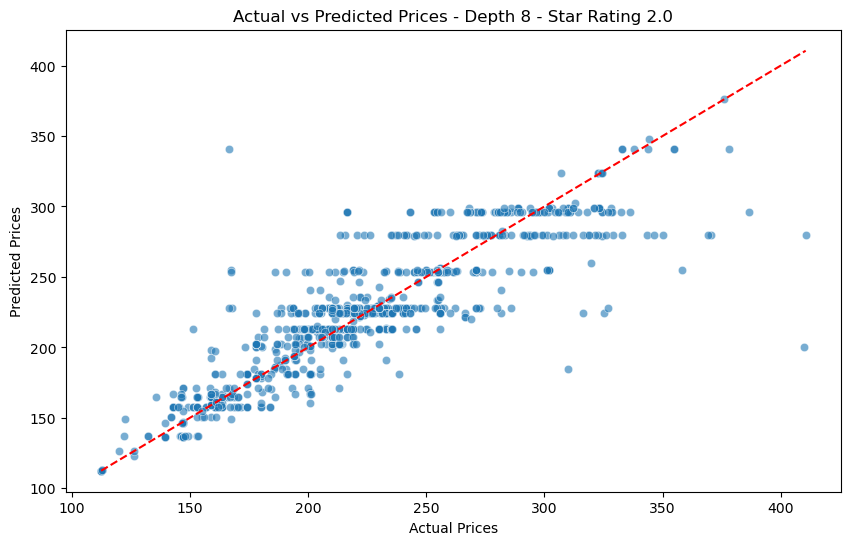

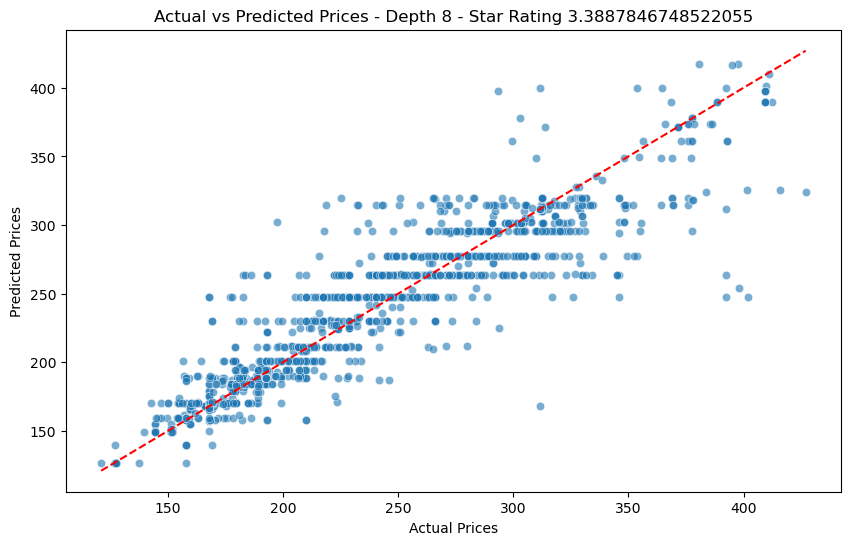

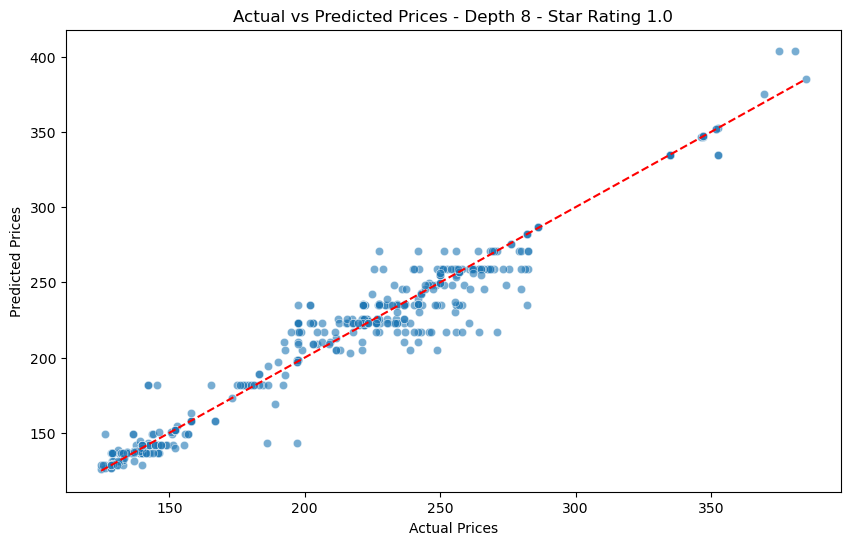

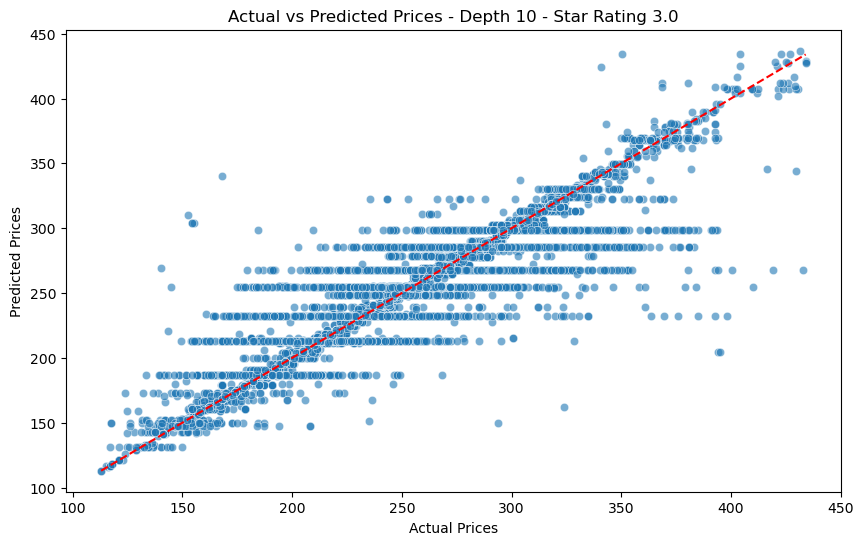

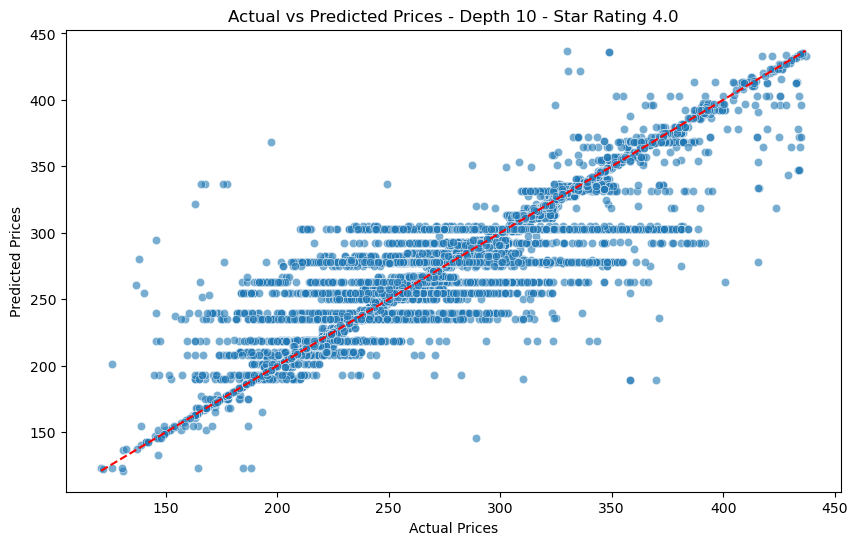

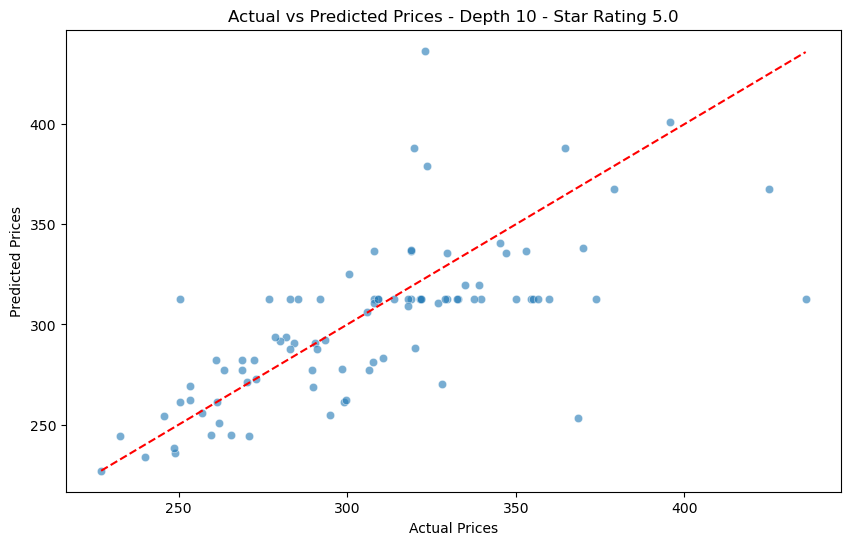

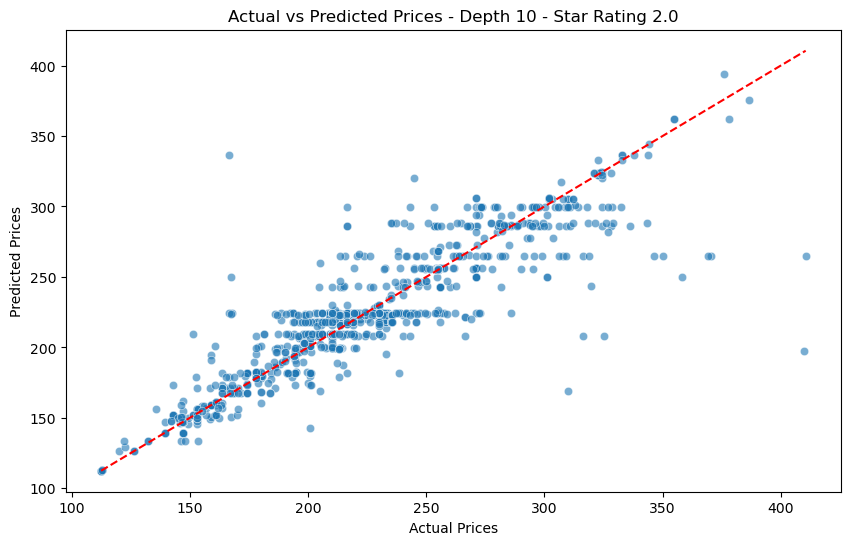

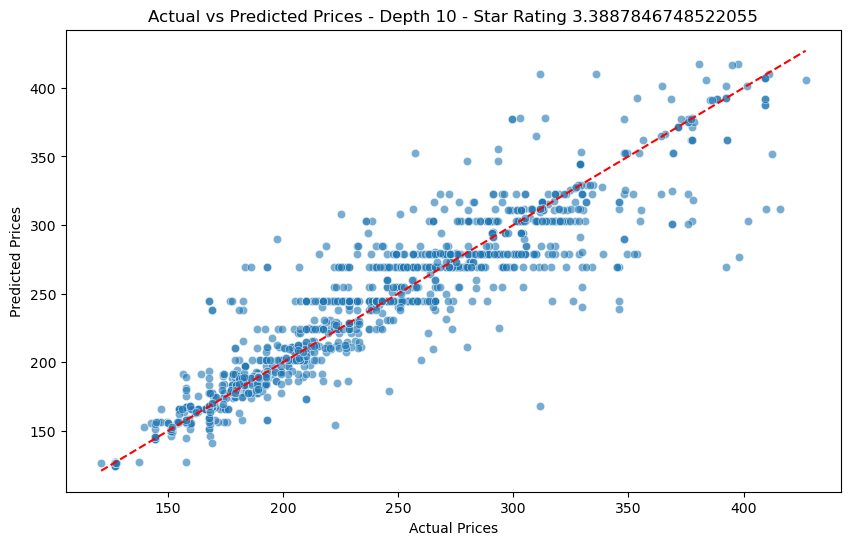

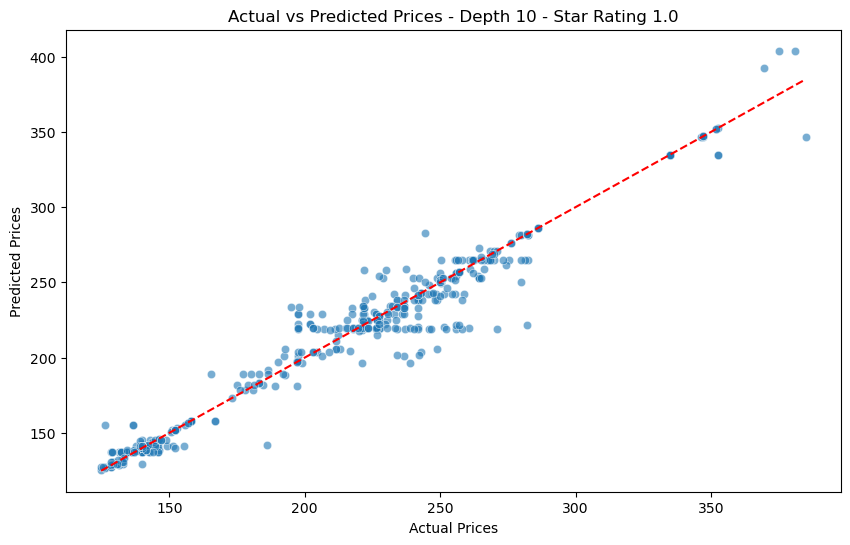

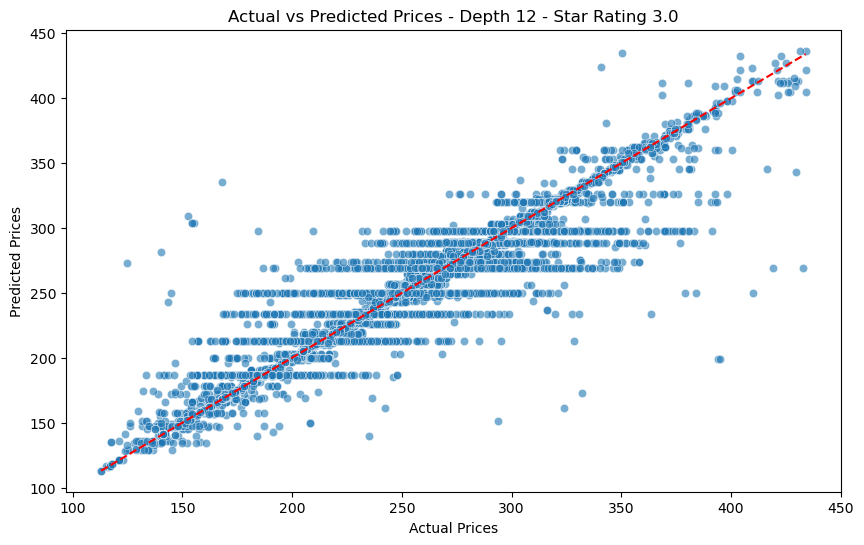

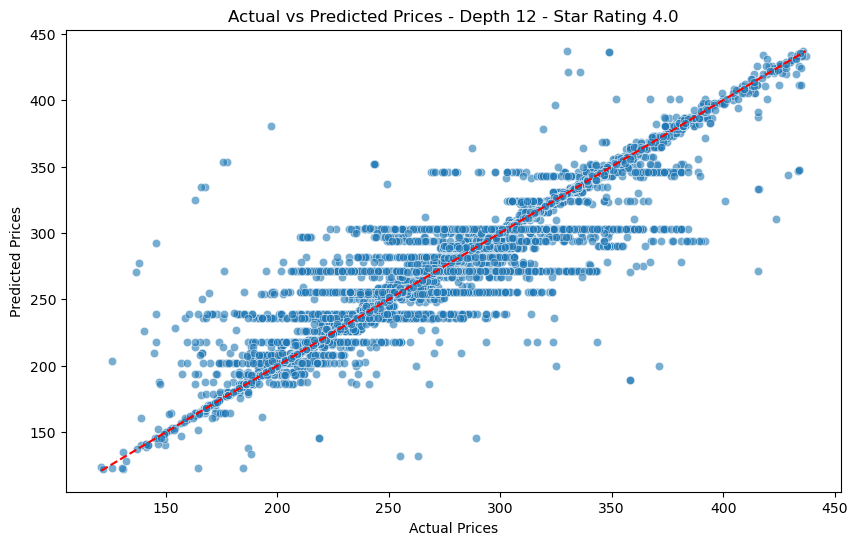

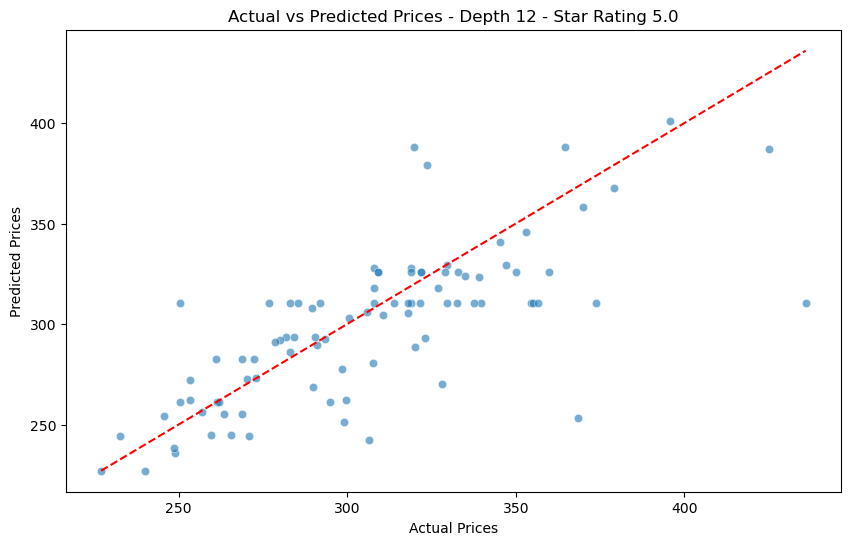

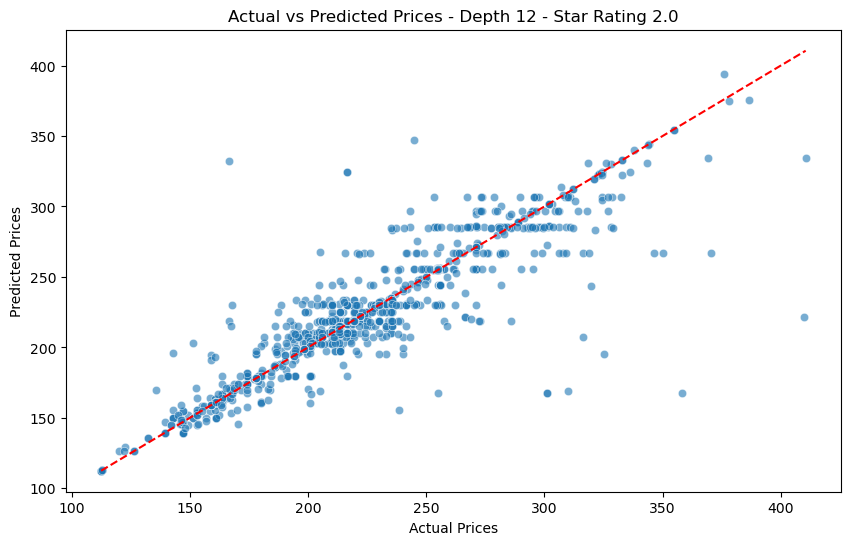

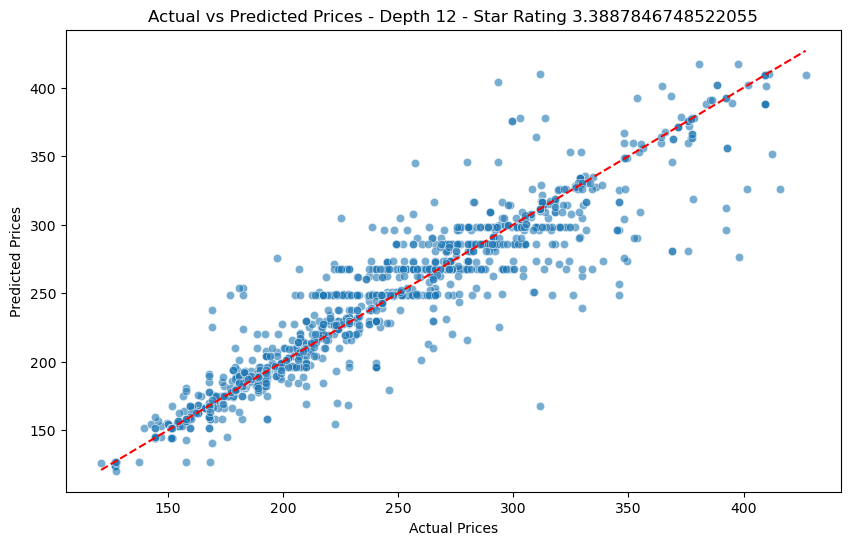

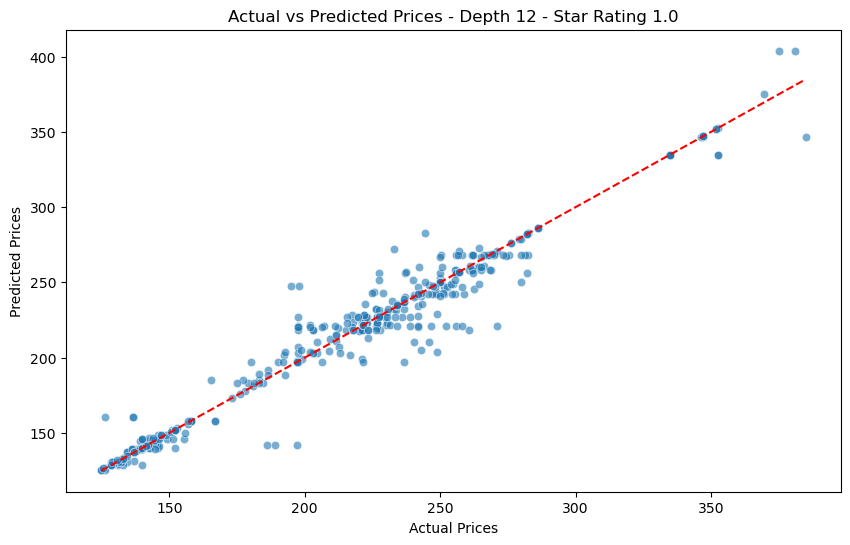

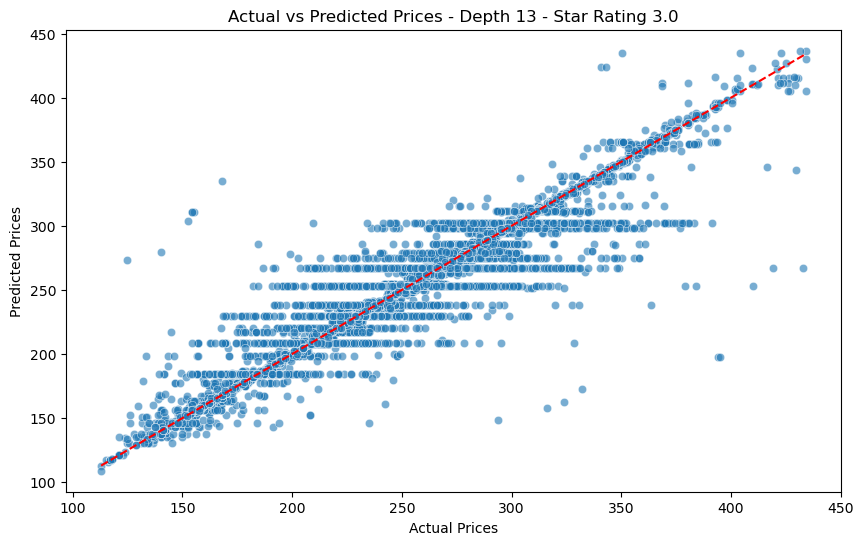

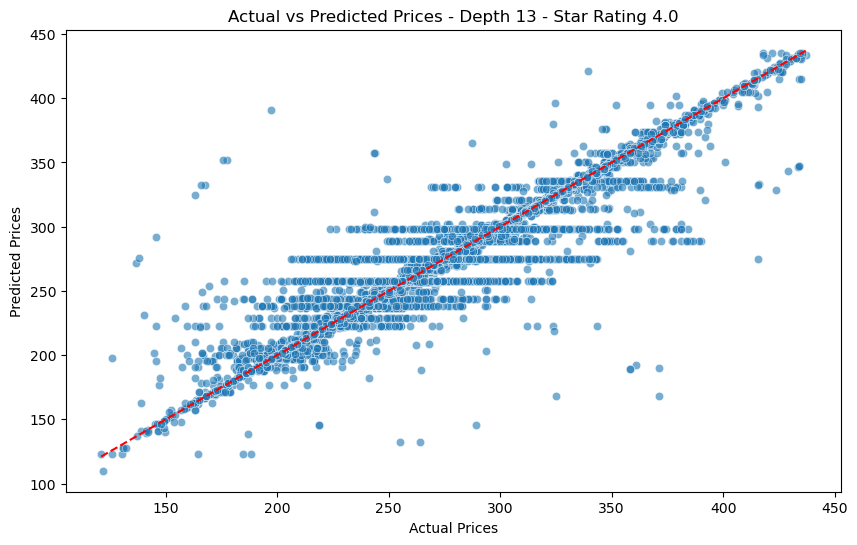

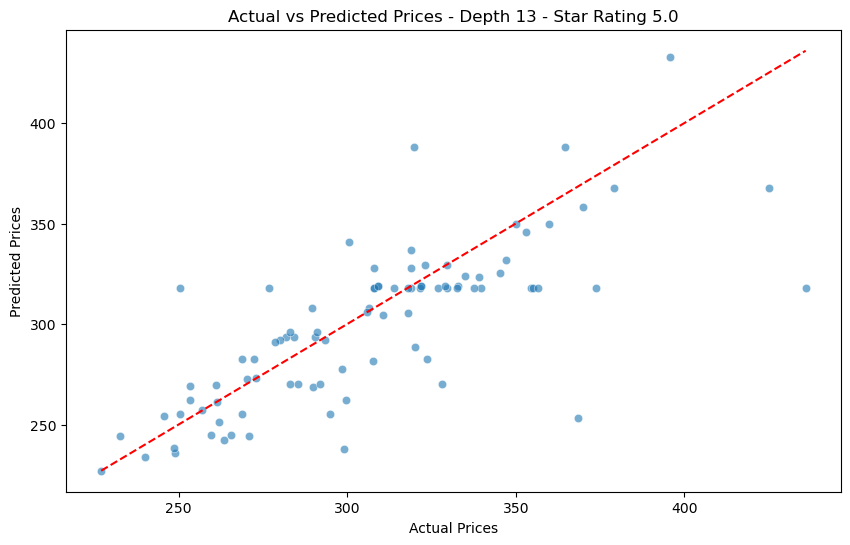

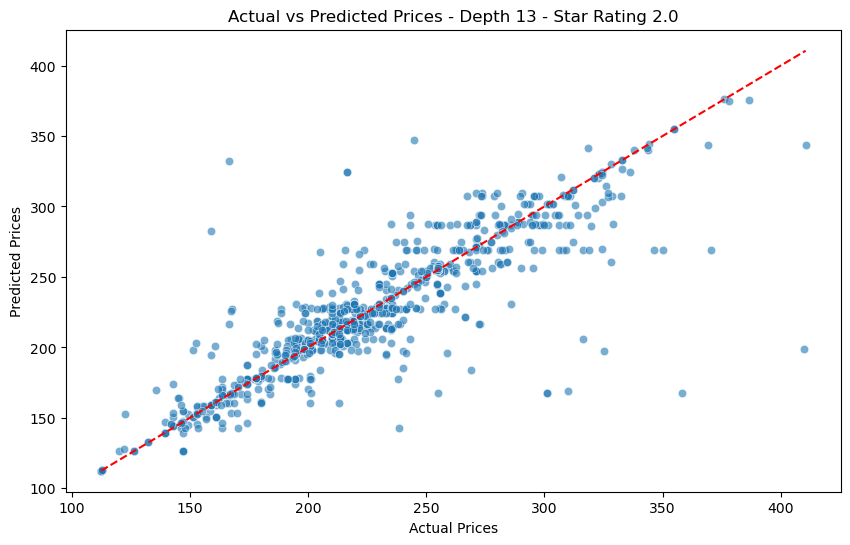

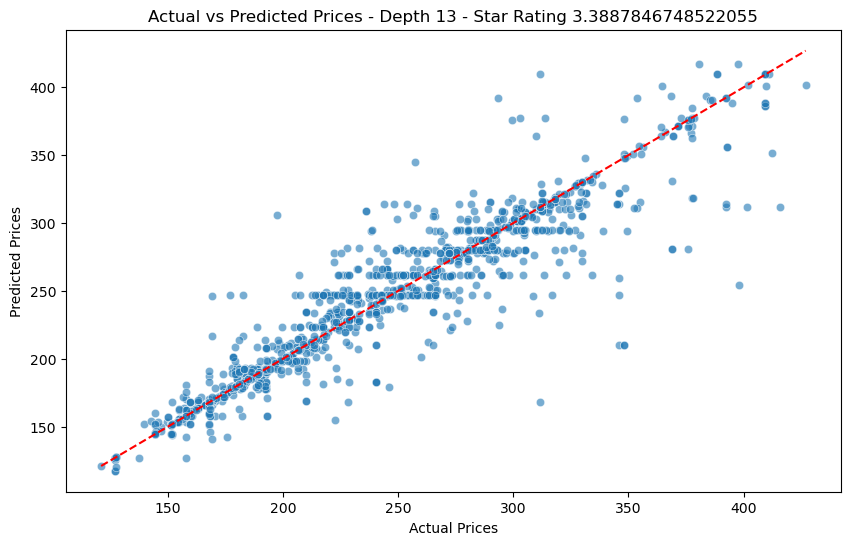

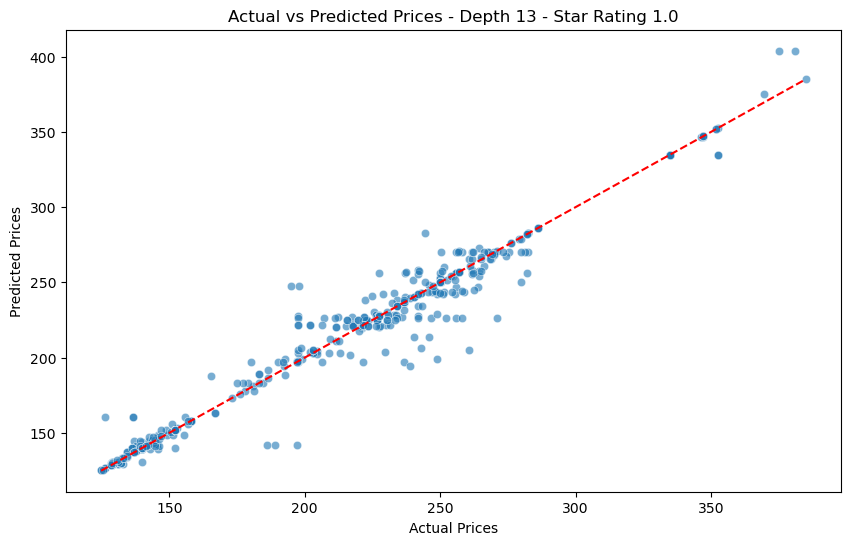

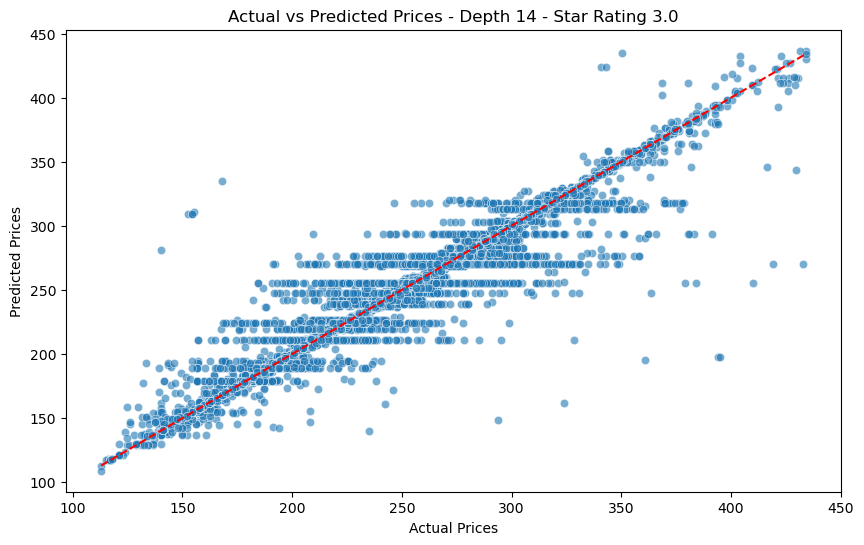

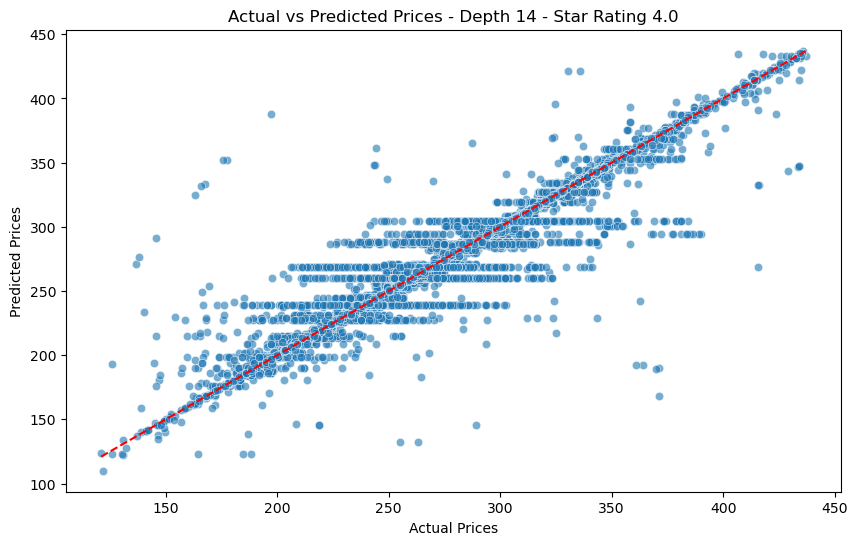

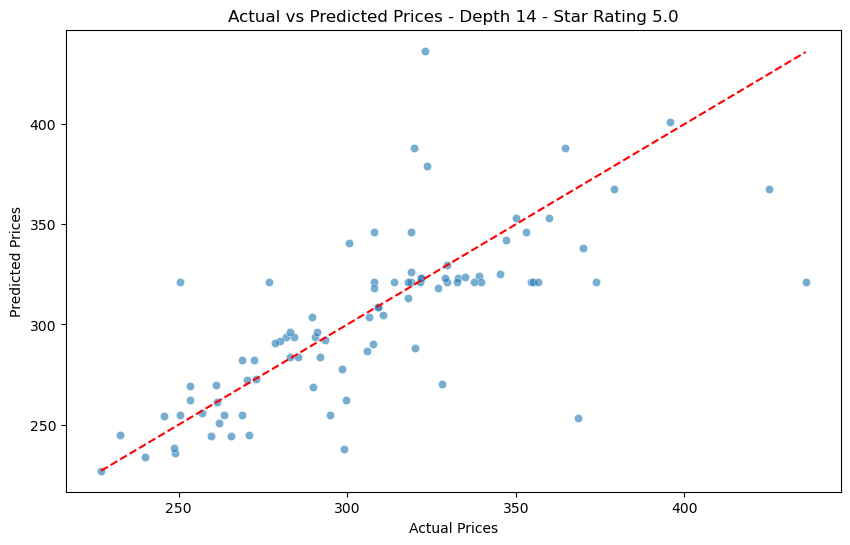

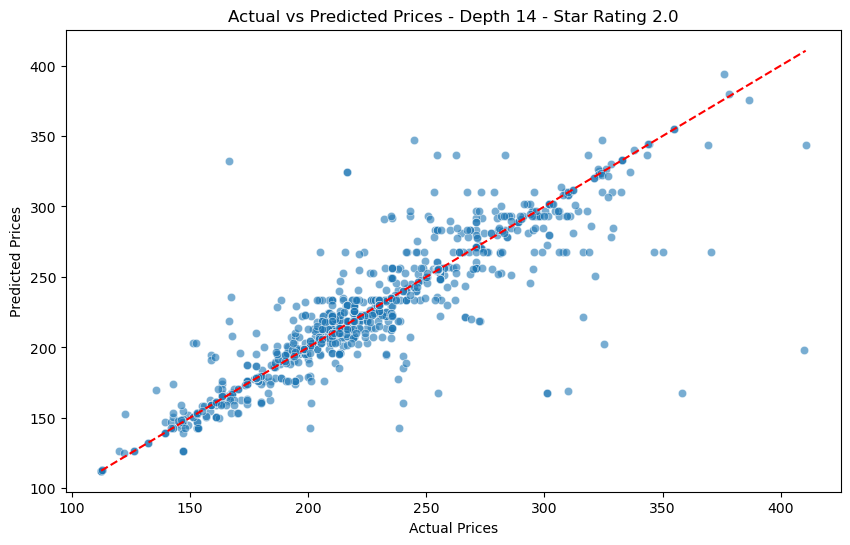

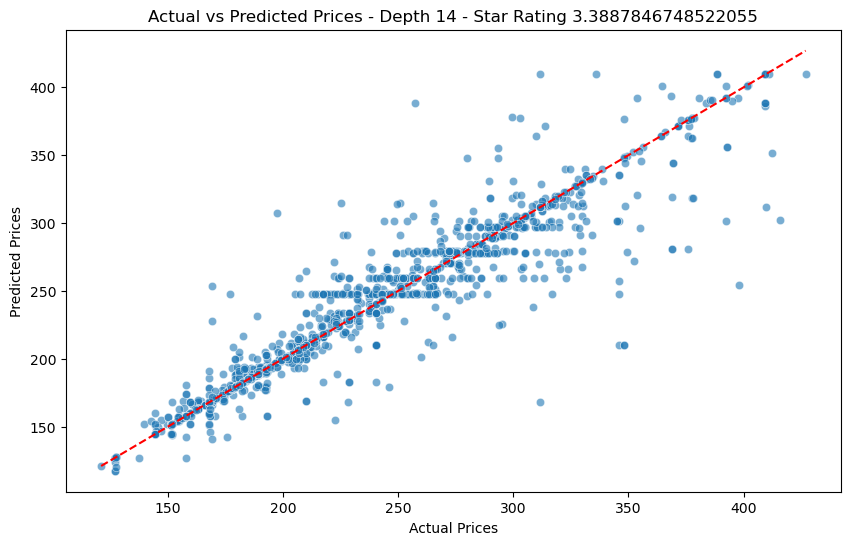

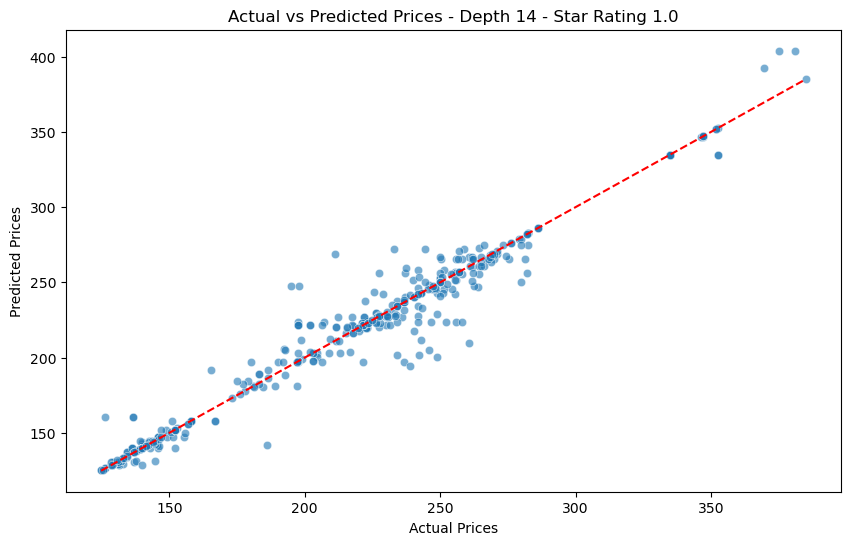

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the preprocessed data splits
with open('train_test_splits.pkl', 'rb') as f:
    X_train_splits, X_test_splits, y_train_splits, y_test_splits = pickle.load(f)

# Initialize models with different depths
depths = [6, 8, 10, 12,13,14]
results = []
predictions = {}

for depth in depths:
    for star_rating, X_train in X_train_splits.items():
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(X_train, y_train_splits[star_rating])
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test_splits[star_rating])
        
        # Training metrics
        train_r2 = r2_score(y_train_splits[star_rating], y_train_pred)
        train_rmse = mean_squared_error(y_train_splits[star_rating], y_train_pred, squared=False)
        train_mse = mean_squared_error(y_train_splits[star_rating], y_train_pred)
        train_mae = mean_absolute_error(y_train_splits[star_rating], y_train_pred)
        
        # Test metrics
        test_r2 = r2_score(y_test_splits[star_rating], y_test_pred)
        test_rmse = mean_squared_error(y_test_splits[star_rating], y_test_pred, squared=False)
        test_mse = mean_squared_error(y_test_splits[star_rating], y_test_pred)
        test_mae = mean_absolute_error(y_test_splits[star_rating], y_test_pred)
        
        results.append({
            'Depth': depth,
            'Star Rating': star_rating,
            'Train R2': train_r2,
            'Train RMSE': train_rmse,
            'Train MSE': train_mse,
            'Train MAE': train_mae,
            'Test R2': test_r2,
            'Test RMSE': test_rmse,
            'Test MSE': test_mse,
            'Test MAE': test_mae
        })
        
        # Store predictions for plotting
        predictions[f'Depth {depth} - Star Rating {star_rating}'] = (y_test_splits[star_rating], y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results with Star Rating as First Node:")
print(results_df)

# Plot actual vs predicted prices for each depth and star rating
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()


## summary and Conclusions :
In this notebook we tried to run regression decision trees at several different depths.
It could be seen, as in most of the models we ran, that the addition of the features (we added a check-in day, a check-out day, a period of the month) helped improve the performance of the algorithm significantly.

In addition, we tried to create a situation where the first node of each tree is the star rating of that tree. You can see in the results that this solution was ideal for hotels at lower levels and for some reason as the star rating went up the results were a little less good and at 5 stars the results were worse. It may be because there were not enough examples of 5-star hotels.
 
 In conclusion, we can say that as we increased the depth of the tree up to a depth of 14, the results did improve and this is an excellent algorithm for our problem. When his errors are very low and his R2 score is very high. (0.96 in depth 14 with the features we added).
It might even be more correct to use a tree with a lower depth (12 or 13) in order to expand the capabilities of the algorithms to achieve good results for anomalies because it does not significantly harm the R2 score.